In [1]:
import latent_space
from PIL import Image
import numpy as np
import output
from histology_main import get_session,close_session
from constants import FULL_OUTPUT_PATH, BATCH_SIZE, Z_NOISE_DIM
import tensorflow as tf
import matplotlib.pylab as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import os
from glob import glob
import random
%matplotlib inline
import dcgan_alt as dcgan
from utils import change_active_config

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


# CelebA : Aritmetica de vectores conceptuales con imagenes de caras

In [2]:
dataset = "celebA"
change_active_config(dataset)

In [3]:
session, input_real, input_z = get_session(1)
z_batch_tensor = tf.random.uniform(
        (BATCH_SIZE, Z_NOISE_DIM), dtype=tf.float32, minval=-1, maxval=1)

INFO:tensorflow:Restoring parameters from /home/ruben/Master/celebA/checkpoints/model-121000
121000


In [4]:
#clean up
[os.remove(file) for file in glob(FULL_OUTPUT_PATH+"*"+dataset+"*.png")]
#Generamos unas 300 imagenes (32*10)
output.generate_samples(session, z_batch_tensor, input_z, BATCH_SIZE * 10, save_tensor=True, name_prefix=dataset)

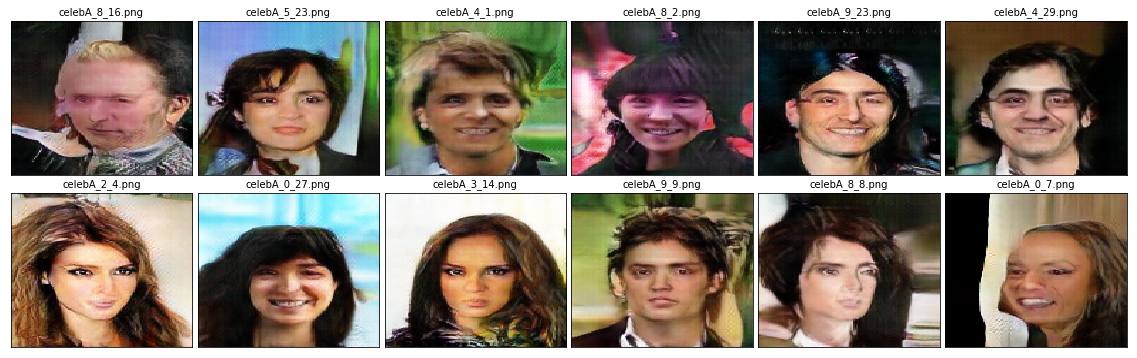

In [10]:
all_files = glob(FULL_OUTPUT_PATH+"*"+dataset+"*.png")
files_to_show = random.sample(all_files,12)
plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.12, wspace=0.03)
for i,img_file in enumerate(files_to_show):
    img = plt.imread(img_file)
    plt.subplot(2, 6, i+1).set_title(img_file.split("/")[-1]).set_fontsize(10)
    plt.imshow(img, aspect="auto")
    plt.xticks([])
    plt.yticks([])
    i=i+1

Seleccionamos 3 mujeres sonriendo, 3 mujeres serias, y 3 hombres serios. Vamos a realizar la operacion 3 - 3 + 3 = ?

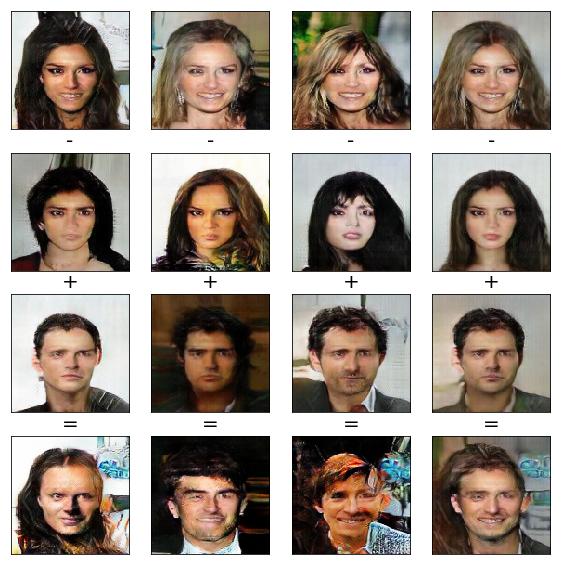

In [11]:
mujer_sonriendo_1 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_0_1.txt')
mujer_sonriendo_2 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_3_5.txt')
mujer_sonriendo_3 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_0_10.txt')

mujer_seria_1 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_8_9.txt')
mujer_seria_2 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_3_14.txt')
mujer_seria_3 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_4_15.txt')

hombre_serio_1 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_4_27.txt')
hombre_serio_2 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_5_12.txt')
hombre_serio_3 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_8_13.txt')

resultado_1 = mujer_sonriendo_1 - mujer_seria_1 + hombre_serio_1
resultado_2 = mujer_sonriendo_2 - mujer_seria_2 + hombre_serio_2
resultado_3 = mujer_sonriendo_3 - mujer_seria_3 + hombre_serio_3

mujer_sonriendo = np.mean([mujer_sonriendo_1 ,mujer_sonriendo_2 ,mujer_sonriendo_3], axis=0) 
mujer_seria = np.mean([mujer_seria_1 ,mujer_seria_2 ,mujer_seria_3], axis=0) 
hombre_serio = np.mean([hombre_serio_1 ,hombre_serio_2 ,hombre_serio_3], axis=0) 
resultado_medias = mujer_sonriendo - mujer_seria + hombre_serio

resultados = [mujer_sonriendo_1,mujer_sonriendo_2,mujer_sonriendo_3,mujer_sonriendo,
              mujer_seria_1,mujer_seria_2,mujer_seria_3,mujer_seria,
              hombre_serio_1,hombre_serio_2,hombre_serio_3,hombre_serio,
              resultado_1,resultado_2,resultado_3,resultado_medias]


plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.2, wspace=0.03)
for i,img in enumerate(resultados):
    img = np.expand_dims(img,0)
    z_ = tf.placeholder(tf.float32, [1, Z_NOISE_DIM])
    samples = session.run(dcgan.sampler(z_,1), feed_dict={z_: img})
    img = np.squeeze(samples)
    subplt = plt.subplot(4, 4, i+1)
    subplt.set_title("" if i<4 else "-" if (i>3 and i<8) else "+" if (i>7 and i<12) else "=").set_fontsize(20)
    plt.imshow(img / 2 + 0.5)
    plt.xticks([])
    plt.yticks([])


In [ ]:
sum_tensor = latent_space.substract_tensors(tensor_pos,tensor_neg)
sum_tensor = latent_space.add_tensors(other_tensor,sum_tensor)
sum_tensor = np.expand_dims(sum_tensor, 0)

z_ = tf.placeholder(tf.float32, [1, Z_NOISE_DIM])
samples = session.run(dcgan.sampler(z_,1), feed_dict={z_: sum_tensor})
img = np.squeeze(samples)
Image.fromarray(output.transform_image(output.image_from_array(img)).astype(np.uint8)).show()

Seleccionamos 3 hombres rubios con gafas, 3 hombres morenos con gafas, y 3 mujeres morenas.

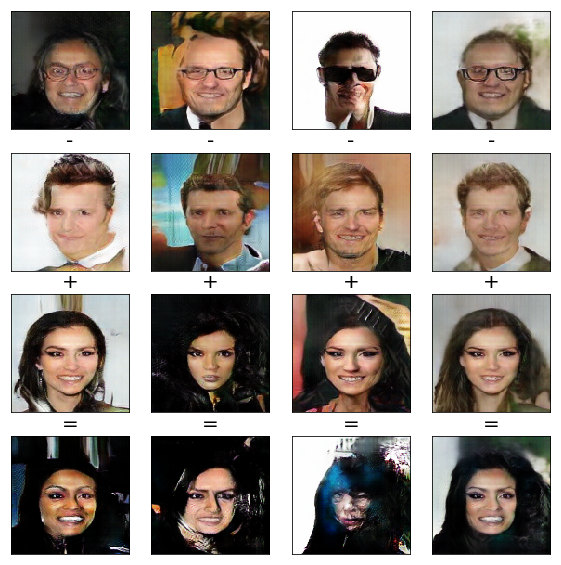

In [20]:
hombre_rubio_1 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_3_28.txt')
hombre_rubio_2 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_3_18.txt')
hombre_rubio_3 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_2_0.txt')

hombre_moreno_gafas_1 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_7_14.txt')
hombre_moreno_gafas_2 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_4_23.txt')
hombre_moreno_gafas_3 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_3_26.txt')

mujer_morena_1 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_6_25.txt')
mujer_morena_2 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_6_18.txt')
mujer_morena_3 = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_6_13.txt')

resultado_1 = hombre_moreno_gafas_1 - hombre_rubio_1 + mujer_morena_1
resultado_2 = hombre_moreno_gafas_2 - hombre_rubio_2 + mujer_morena_2
resultado_3 = hombre_moreno_gafas_3 - hombre_rubio_3 + mujer_morena_3

hombre_rubio = np.mean([hombre_rubio_1 ,hombre_rubio_2 ,hombre_rubio_3], axis=0) 
hombre_moreno_gafas = np.mean([hombre_moreno_gafas_1 ,hombre_moreno_gafas_2 ,hombre_moreno_gafas_3], axis=0) 
mujer_morena = np.mean([mujer_morena_1 ,mujer_morena_2 ,mujer_morena_3], axis=0) 
resultado_medias = hombre_moreno_gafas - hombre_rubio + mujer_morena

resultados = [hombre_moreno_gafas_1,hombre_moreno_gafas_2,hombre_moreno_gafas_3,hombre_moreno_gafas,
              hombre_rubio_1,hombre_rubio_2,hombre_rubio_3,hombre_rubio,
              mujer_morena_1,mujer_morena_2,mujer_morena_3,mujer_morena,
              resultado_1,resultado_2,resultado_3,resultado_medias]


plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.2, wspace=0.03)
for i,img in enumerate(resultados):
    img = np.expand_dims(img,0)
    z_ = tf.placeholder(tf.float32, [1, Z_NOISE_DIM])
    samples = session.run(dcgan.sampler(z_,1), feed_dict={z_: img})
    img = np.squeeze(samples)
    plt.subplot(4, 4, i+1).set_title("" if i<4 else "-" if (i>3 and i<8) else "+" if (i>7 and i<12) else "=").set_fontsize(20)
    plt.imshow(img / 2 + 0.5)
    plt.xticks([])
    plt.yticks([])

En este caso no parece haber dado muy buen resultado

Otro tipo de operacion que podemos realizar es elegir dos tensores y avanzar por la "linea" que los une en el espacio latente, creando asi una interpolacion suave de imagenes intermedias

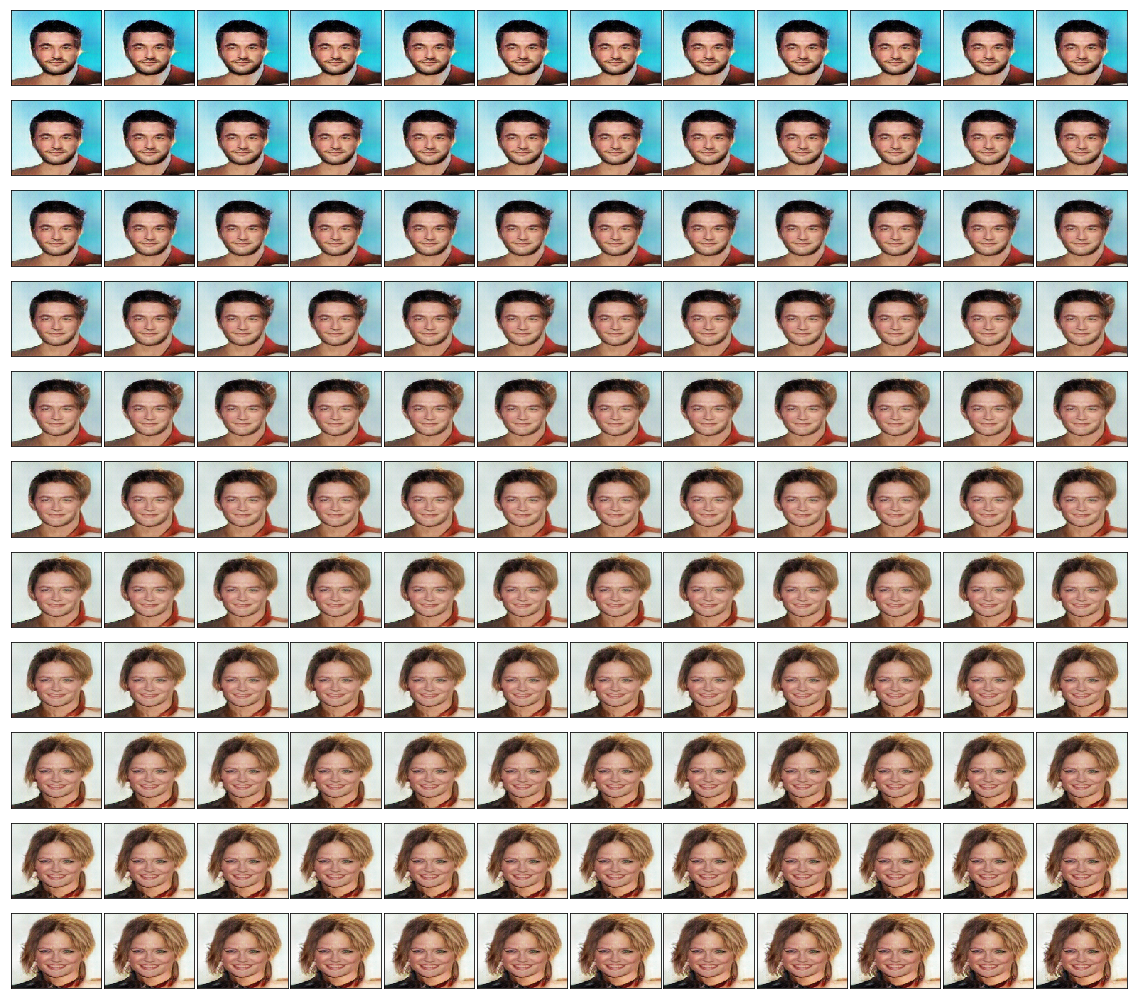

In [9]:
from utils import natural_keys

#clean up
[os.remove(file) for file in glob(FULL_OUTPUT_PATH+"*interp*.png")]
punto_a = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_6_22.txt')
punto_b = np.loadtxt(FULL_OUTPUT_PATH + 'celebA_8_31.txt')
latent_space.interpolate(session, punto_a, punto_b, 132)

all_files = glob(FULL_OUTPUT_PATH+"*interp*")
all_files.sort(key=natural_keys)
plt.figure(figsize=(20, 18))
plt.subplots_adjust(hspace=0.2, wspace=0.03)
for i,img in enumerate(all_files):
    img = plt.imread(img)
    plt.subplot(11, 12, i+1)
    plt.imshow(img, aspect="auto")
    plt.xticks([])
    plt.yticks([])


In [16]:
import imageio
images = []
for filename in all_files:
    images.append(imageio.imread(filename))
imageio.mimsave('faces1.gif', images)

![SegmentLocal](faces1.gif "segment")

Por ultimo he añadido una funcionalidad que permite buscar el tensor que genera una imagen concreta. La busqueda se realiza mediante gradiente descendiente, y dependiendo del grado de entrenamiento de la red es capaz de encontrar, en el caso de imagenes generadas, el mismo tensor que generó esa imagen inicialmente o uno que genere una imagen practicamente idéntica. En el caso de imágenes reales, necesitamos un espacio latente muy entrenado para que los resultados sean satisfactorios.

In [ ]:
#real_pos_image = Image.open('example_images/real/positive.jpeg')
#real_neg_image = Image.open('example_images/real/negative.jpeg')
#_, tensor_a = latent_space.search_image(session, real_pos_image)
#_, tensor_b = latent_space.search_image(session, real_neg_image)

In [11]:
close_session(session)